In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm

In [3]:
scores = pd.read_csv('Polarity Scores.csv')
songs = pd.read_csv('Songs_Sampled.csv')
songs.head(2)

,Unnamed: 0,index,Rank,Song,Performer,SongID,spotify_genre,spotify_track_popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Datetime,Year
0,0,242,1,Smoke Gets In Your Eyes,The Platters,Smoke Gets In Your EyesThe Platters,"['adult standards', 'brill building pop', 'doo...",63.0,0.203,0.295,...,1.0,0.0323,0.920000,0.000002,0.173,0.285,171.222,3.0,1959-01-31,1959
1,1,1967,2,Telstar,The Tornadoes,TelstarThe Tornadoes,['surf music'],8.0,0.289,0.728,...,0.0,0.0385,0.000368,0.929000,0.381,0.539,143.988,4.0,1963-01-19,1963


In [4]:
years = songs['Year']
comp_score = scores['Comp_Score']
feature = songs['valence']
interaction = []

for i in range(600):
    interaction.append(years[i] * feature[i])

In [5]:
dict = { 'Year': years,
        'Feature': feature,
        'Interaction': interaction,
        'Comp_Score': comp_score
}

df = pd.DataFrame(dict)
df = df.dropna()
df.head(3)

,Year,Feature,Interaction,Comp_Score
0,1959,0.285,558.315,0.9792
1,1963,0.539,1058.057,0.8934
2,1962,0.271,531.702,1.0000


In [6]:
X = df[['Year', 'Feature', 'Interaction']]
y = df['Comp_Score']
model = sm.OLS(y, X)
results = model.fit()
results.params

Year            0.000282
Feature        17.184318
Interaction    -0.008680
dtype: float64

In [7]:
decades = []
for row_index, row in df.iterrows():
    year = df.at[row_index, 'Year']
    if year < 1970:
        decades.append('1958-1969')
    elif (year >= 1970 and year < 1980):
        decades.append('1970-1979')
    elif (year >= 1980 and year < 1990):
        decades.append('1980-1989')
    elif (year >= 1990 and year < 2000):
        decades.append('1990-1999')
    elif (year >= 2000 and year < 2010):
        decades.append('2000-2010')
    else:
        decades.append('2010-2019')

In [8]:
residuals = []
for row_index, row in df.iterrows():
    y = df.at[row_index, 'Year']
    f = df.at[row_index, 'Feature']
    i = df.at[row_index, 'Interaction'] 
    measured = df.at[row_index, 'Comp_Score']
    predicted = results.predict([y, f, i])[0]
    residuals.append(predicted-measured)

In [9]:
df['Decade'] = decades
df['Residual'] = residuals

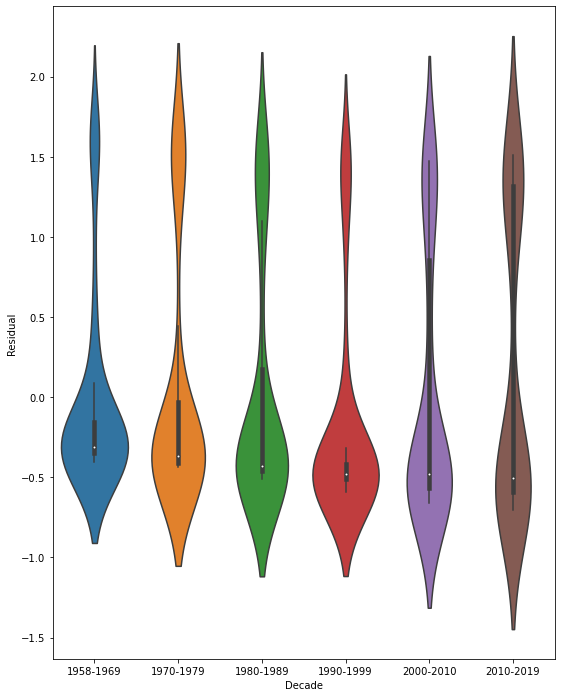

In [10]:
fig, ax = plt.subplots(figsize=(9, 12))
ax = sns.violinplot(x='Decade', y='Residual', data=df)

In [11]:
scores

,Pos_Score,Neu_Score,Neg_Score,Comp_Score
0,0.283,0.599,0.118,0.9792
1,0.149,0.788,0.063,0.8934
2,0.122,0.797,0.081,1.0000
3,0.134,0.755,0.112,0.9999
4,0.092,0.786,0.121,-0.5120
...,...,...,...,...
595,0.153,0.813,0.034,0.9972
596,0.133,0.676,0.191,-0.9850
597,0.197,0.788,0.015,0.9967
598,0.128,0.824,0.048,0.9863
